## ChatGPT making model using XGBoost Regressor and Yes/No features

```
prompt:
Give me a simple example of using XGBoost regressor using sklearn interface.
The model should predict the price of a house using
two binary features - having values "Yes" or "No".

Provide the python code to generate the training data with 10,000 rows.
Train the model, test it, print the metrics of the quality of the model.

Provide the matplotlib 3D graphics demonstrating 
the data, the prediction, and the error.
Please make 3d graphs showing data (target vs features), prediction, and error. 

Please make 3 graphs.
And then please put all three plots together on one graph.
Please use different colors and marker sizes to make things visible.
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generate synthetic data
np.random.seed(42)
num_samples = 10000
num_features = 2

# Generate binary features
X = np.random.choice([0, 1], size=(num_samples, num_features))

# Generate target prices with some random noise
base_price = 100000
noise = np.random.normal(0, 5000, num_samples)
y = base_price + X.sum(axis=1) * 20000 + noise

In [3]:
# Create a DataFrame for better visualization
columns = [f'Feature_{i}' for i in range(1, num_features + 1)]
X_df = pd.DataFrame(X, columns=columns)
X_df = X_df.replace({0: 'No', 1: 'Yes'})
X_df['Price'] = y
X_df

,Feature_1,Feature_2,Price
0,No,Yes,112560.691483
1,No,No,94374.069491
2,No,Yes,121944.094551
3,No,No,94130.633368
4,No,Yes,125563.171526
...,...,...,...
9995,No,Yes,119859.378380
9996,Yes,No,123961.975197
9997,Yes,No,124972.590580
9998,No,No,96513.351708


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [6]:
# Predict the target values for the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate the quality of the prediction
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

Mean Squared Error: 24214231.2223
R2 Score: 0.8941


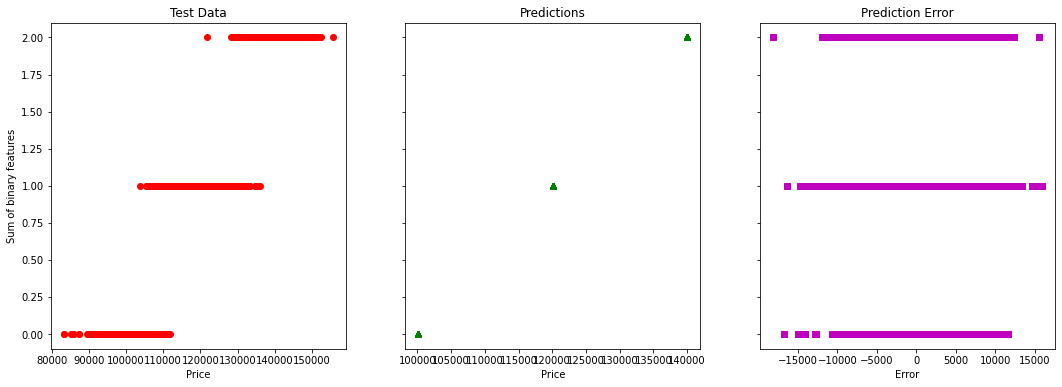

In [7]:
# Visualize the data, prediction, and error
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot the test data
ax1.scatter(y_test, X_test.sum(axis=1), c='r', marker='o', label='Test data')
ax1.set_xlabel('Price')
ax1.set_ylabel('Sum of binary features')
ax1.set_title('Test Data')

# Plot the predictions
ax2.scatter(y_pred, X_test.sum(axis=1), c='g', marker='^', label='Predictions')
ax2.set_xlabel('Price')
ax2.set_title('Predictions')

# Plot the errors
ax3.scatter(y_test - y_pred, X_test.sum(axis=1), c='m', marker='s', label='Error')
ax3.set_xlabel('Error')
ax3.set_title('Prediction Error')

plt.show()

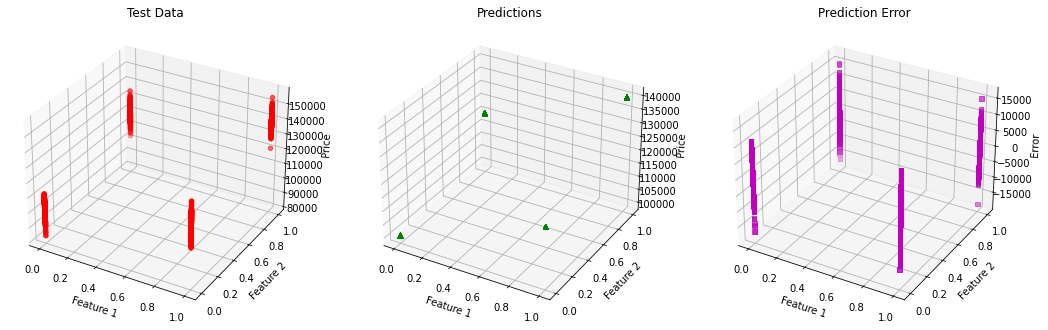

In [8]:
# Show in 3D graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the data, prediction, and error in 3D
fig = plt.figure(figsize=(18, 6))

# Plot the test data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='o', label='Test data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Price')
ax1.set_title('Test Data')

# Plot the predictions
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='g', marker='^', label='Predictions')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Price')
ax2.set_title('Predictions')

# Plot the errors
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_test[:, 0], X_test[:, 1], y_test - y_pred, c='m', marker='s', label='Error')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Error')
ax3.set_title('Prediction Error')

plt.show()

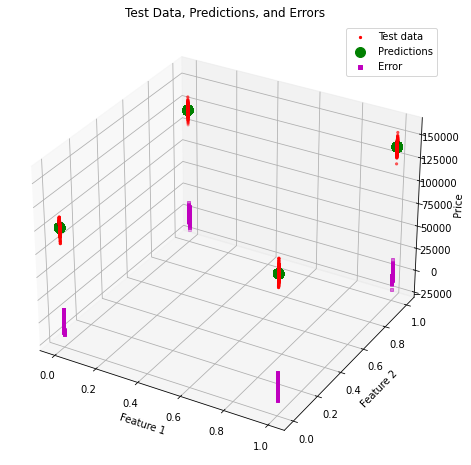

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize the data, prediction, and error in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the test data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='.', s=20, label='Test data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Price')

# Plot the predictions
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='g', marker='o', s=100, label='Predictions')

# Plot the errors
ax.scatter(X_test[:, 0], X_test[:, 1], y_test - y_pred, c='m', marker='s', s=10, label='Error')

# Set the title and show the legend
ax.set_title('Test Data, Predictions, and Errors')
ax.legend()

plt.show()
